In [1]:
from backdoor import image_utils, dataset

In [2]:
dataset = dataset.kmnist.KuzushijiMNIST()

In [3]:
x0 = dataset.get_data()['train'][0]

In [4]:
from backdoor.image_utils import ImageFormat

In [5]:
ImageFormat.detect_format(x0)

'torch'

In [6]:
x0.shape

(60000, 3, 28, 28)

In [8]:
import numpy as np
np.moveaxis(x0, -3, -1).shape

(60000, 28, 28, 3)

In [24]:
single_cvt = ImageFormat.scikit(x0)
double_cvt = ImageFormat.scikit(ImageFormat.torch(single_cvt))

In [19]:
x0.shape

(60000, 3, 28, 28)

In [26]:
(double_cvt - single_cvt).max()

0

In [4]:
from skimage.io import imread, imshow

In [5]:
patch=imread('./patches/28x28_3x3_checkerboard_bl.png')

In [6]:
import numpy as np
x0_swap = np.moveaxis(x0, 0, -1)

In [7]:
patched = image_utils.overlay_transparent_patch(x0_swap, patch)

In [8]:
patched

array([[[ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        ...,
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.]],

       [[ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        ...,
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.]],

       [[ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        ...,
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.]],

       ...,

       [[ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [255., 255., 255.],
        ...,
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.]],

       [[ -1.,  -1.,  -1.],
        [255., 255., 255.],
        [ -1.,  -1.,  -1.],
        ...,
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.]],

       [[ -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.],
        [ -1.,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


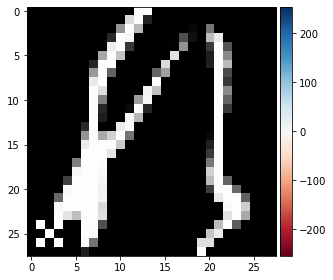

In [9]:
imshow(patched)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


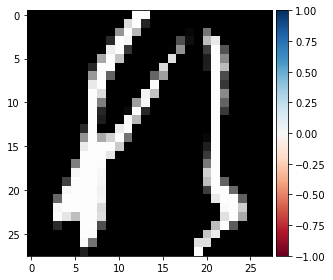

In [10]:
imshow(x0_swap)

In [1]:
import torch

In [3]:
loss=torch.nn.CrossEntropyLoss()

In [4]:
loss.reduction

'mean'

TypeError: 'torch.dtype' object is not callable